In [69]:
path = "Resources/Valve_Player_Data.csv"

import matplotlib.pyplot as plt
import pandas as pd
import requests
import numpy as np
from pprint import pprint
import time
import datetime
from dateutil.relativedelta import relativedelta

In [2]:
monthly_players = pd.read_csv(path)
monthly_players

,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name
0,September 2021,512350.92,268.96,+0.05%,942519,https://steamcharts.com/app/730,2021-09-01,Counter Strike: Global Offensive
1,August 2021,512081.96,6014.60,+1.19%,802544,https://steamcharts.com/app/730,2021-08-01,Counter Strike: Global Offensive
2,July 2021,506067.36,-43279.72,-7.88%,763523,https://steamcharts.com/app/730,2021-07-01,Counter Strike: Global Offensive
3,June 2021,549347.08,-110541.81,-16.75%,929940,https://steamcharts.com/app/730,2021-06-01,Counter Strike: Global Offensive
4,May 2021,659888.89,-63457.63,-8.77%,1087197,https://steamcharts.com/app/730,2021-05-01,Counter Strike: Global Offensive
...,...,...,...,...,...,...,...,...
5266,December 2016,192.03,-21.90,-10.24%,405,https://steamcharts.com/app/435150,2016-12-01,Divinity: Original Sin 2
5267,November 2016,213.92,-134.68,-38.63%,537,https://steamcharts.com/app/435150,2016-11-01,Divinity: Original Sin 2
5268,October 2016,348.60,-201.75,-36.66%,1031,https://steamcharts.com/app/435150,2016-10-01,Divinity: Original Sin 2
5269,September 2016,550.36,543.26,+7654.89%,2836,https://steamcharts.com/app/435150,2016-09-01,Divinity: Original Sin 2


In [3]:
monthly_players.nunique()

Month_Year       111
Avg_players     5241
Gain            5135
Percent_Gain    3685
Peak_Players    4988
URL               98
Date             111
Game_Name         98
dtype: int64

In [4]:
monthly_players.dtypes

Month_Year       object
Avg_players     float64
Gain            float64
Percent_Gain     object
Peak_Players      int64
URL              object
Date             object
Game_Name        object
dtype: object

In [5]:
# EXTRACT AND TRANSFORM DATA

# drop first two months for every game as these extreme values will totally skew the data.

In [6]:
monthly_players.Game_Name.unique()

array(['Counter Strike: Global Offensive', 'Dota 2',
       'PUBG: Battlegrounds', 'Apex Legends', 'Team Fortress 2',
       'Grand Theft Auto V', 'NARAKA: BLADEPOINT', 'Wallpaper Engine',
       'Rust', 'Destiny 2', 'Warframe', 'Cookie Clicker',
       "Tom Clancy's Rainbow Six Seige", 'Football Manager 2021 ',
       'PAYDAY 2', 'ARK: Survival Evolved', 'Dead by Daylight',
       "Sid Meier's Civilization VI", 'MIR4', 'Unturned', 'Terraria',
       'War Thunder', 'Hearts of Iron IV', 'Battlefield V', 'Valheim',
       'World of Tanks Blitz', 'Dayz', 'Total War: WARHAMMER II',
       "Don't Starve Together", 'Euro Truck Simulator 2', 'Rocket League',
       "Garry's Mod", 'Monster Hunter: World', 'Stardew Valley',
       'FINAL FANTASY XIV Online', 'Bless Unleashed ',
       'The Witcher 3: Wild Hunt', '雀魂麻将(MahjongSoul)', 'RimWorld',
       'Red Dead Redemption 2', '7 Days to Die', 'Black Desert',
       'Cities: Skylines', "Sid Meier's Civilization V",
       'Farming Simulator 19',

In [7]:
ID_list = monthly_players.URL.unique()

In [8]:
for i in range(0,len(ID_list)):
    ID_list[i] = ID_list[i].replace('https://steamcharts.com/app/', '')
ID_list

array(['730', '570', '578080', '1172470', '440', '271590', '1203220',
       '431960', '252490', '1085660', '230410', '1454400', '359550',
       '1263850', '218620', '346110', '381210', '289070', '1623660',
       '304930', '105600', '236390', '394360', '1238810', '892970',
       '444200', '221100', '594570', '322330', '227300', '252950', '4000',
       '582010', '413150', '39210', '1254120', '292030', '1329410',
       '294100', '1174180', '251570', '582660', '255710', '8930',
       '787860', '489830', '281990', '306130', '550', '1293830', '236850',
       '480', '813780', '1184370', '601510', '250900', '513710', '377160',
       '427520', '261550', '1281930', '1644960', '960090', '291550',
       '438100', '1097150', '107410', '1100600', '552990', '1313860',
       '374320', '1158310', '835570', '275850', '1259970', '1172620',
       '10', '740130', '238960', '629520', '1091500', '1129580',
       '1222680', '739630', '1225330', '1049590', '453480', '594650',
       '526870', '322

In [9]:
# for app in ID_list:
    # read in news data in JSON format from e.g. http://api.steampowered.com/ISteamNews/GetNewsForApp/v0002/?appid=730&count=1000&maxlength=3000&format=json
    # count number of news articles (by type) in each calendar month up to sept 2021, to match the dates in the above dataframe

In [10]:
# add a binary classification 'positive gain?' to the monthly dataframe in order to perform hypertuning.

In [11]:
# Strip the URL data off the app ID
url_list = monthly_players["URL"]
for i in range(0,len(url_list)):
    url_list[i] = url_list[i].replace('https://steamcharts.com/app/', '')

C:\Users\David\AppData\Local\Temp/ipykernel_15168/1115660068.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  url_list[i] = url_list[i].replace('https://steamcharts.com/app/', '')


In [12]:
monthly_players = monthly_players.rename(columns={"URL": "APP"})
monthly_players

,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,APP,Date,Game_Name
0,September 2021,512350.92,268.96,+0.05%,942519,730,2021-09-01,Counter Strike: Global Offensive
1,August 2021,512081.96,6014.60,+1.19%,802544,730,2021-08-01,Counter Strike: Global Offensive
2,July 2021,506067.36,-43279.72,-7.88%,763523,730,2021-07-01,Counter Strike: Global Offensive
3,June 2021,549347.08,-110541.81,-16.75%,929940,730,2021-06-01,Counter Strike: Global Offensive
4,May 2021,659888.89,-63457.63,-8.77%,1087197,730,2021-05-01,Counter Strike: Global Offensive
...,...,...,...,...,...,...,...,...
5266,December 2016,192.03,-21.90,-10.24%,405,435150,2016-12-01,Divinity: Original Sin 2
5267,November 2016,213.92,-134.68,-38.63%,537,435150,2016-11-01,Divinity: Original Sin 2
5268,October 2016,348.60,-201.75,-36.66%,1031,435150,2016-10-01,Divinity: Original Sin 2
5269,September 2016,550.36,543.26,+7654.89%,2836,435150,2016-09-01,Divinity: Original Sin 2


In [13]:
# split dataframe into relational dataframes
games = monthly_players[["APP", "Game_Name"]]
games = games.drop_duplicates().set_index("APP")
games

,Game_Name
APP,
730,Counter Strike: Global Offensive
570,Dota 2
578080,PUBG: Battlegrounds
1172470,Apex Legends
440,Team Fortress 2
...,...
1238840,Battlefield 1
239140,Dying Light
646570,Slay the Spire


In [14]:
reduced_players = monthly_players[["Percent_Gain", "APP", "Date"]]
reduced_players

,Percent_Gain,APP,Date
0,+0.05%,730,2021-09-01
1,+1.19%,730,2021-08-01
2,-7.88%,730,2021-07-01
3,-16.75%,730,2021-06-01
4,-8.77%,730,2021-05-01
...,...,...,...
5266,-10.24%,435150,2016-12-01
5267,-38.63%,435150,2016-11-01
5268,-36.66%,435150,2016-10-01
5269,+7654.89%,435150,2016-09-01


## Remove bad rows

In [15]:
# Drop games with 1 or 2 rows; this is not enough data to extrapolate from, 
# as we will need to drop the first two months of a game's existence
game_id = reduced_players.APP.value_counts()
print(game_id)
clean_ID_list = []

for i in range(0,len(game_id)):
    if game_id[i] > 2:
        clean_ID_list.append(game_id.index[i])
    else:
        print(f"removing {games.loc[game_id.index[i]]}(app ID {game_id.index[i]}) due to having too few months of data")
        
len(clean_ID_list)

730        111
550        111
570        111
440        111
4000       111
          ... 
1203220      2
740130       1
1644960      1
1454400      1
1184370      1
Name: APP, Length: 98, dtype: int64
removing Game_Name    MIR4
Name: 1623660, dtype: object(app ID 1623660) due to having too few months of data
removing Game_Name    Bless Unleashed 
Name: 1254120, dtype: object(app ID 1254120) due to having too few months of data
removing Game_Name    NARAKA: BLADEPOINT
Name: 1203220, dtype: object(app ID 1203220) due to having too few months of data
removing Game_Name    Tales of Arise
Name: 740130, dtype: object(app ID 740130) due to having too few months of data
removing Game_Name    NBA 2k22
Name: 1644960, dtype: object(app ID 1644960) due to having too few months of data
removing Game_Name    Cookie Clicker
Name: 1454400, dtype: object(app ID 1454400) due to having too few months of data
removing Game_Name    Pathfinder: Wrath of Righteous
Name: 1184370, dtype: object(app ID 1184370)

91

In [16]:
# drop bottom two rows of each app, as the initial 2 months feature unusable data (NaN, followed by extreme outlier due to percentage calculation)
temp_df =pd.DataFrame(columns = reduced_players.columns)

for ID in clean_ID_list:
    df = reduced_players[reduced_players.APP == ID]
    df = df.reset_index(drop=True)
    print(df)
    df = df.drop(len(df)-1)
    df = df.drop(len(df)-1)
    print(df)
    temp_df = pd.concat([temp_df, df], ignore_index=True)
reduced_players = temp_df

    Percent_Gain  APP        Date
0         +0.05%  730  2021-09-01
1         +1.19%  730  2021-08-01
2         -7.88%  730  2021-07-01
3        -16.75%  730  2021-06-01
4         -8.77%  730  2021-05-01
..           ...  ...         ...
106      +31.61%  730  2012-11-01
107      -32.88%  730  2012-10-01
108       +3.39%  730  2012-09-01
109    +1559.43%  730  2012-08-01
110          NaN  730  2012-07-01

[111 rows x 3 columns]
    Percent_Gain  APP        Date
0         +0.05%  730  2021-09-01
1         +1.19%  730  2021-08-01
2         -7.88%  730  2021-07-01
3        -16.75%  730  2021-06-01
4         -8.77%  730  2021-05-01
..           ...  ...         ...
104      +14.81%  730  2013-01-01
105       -0.39%  730  2012-12-01
106      +31.61%  730  2012-11-01
107      -32.88%  730  2012-10-01
108       +3.39%  730  2012-09-01

[109 rows x 3 columns]
    Percent_Gain  APP        Date
0        -14.13%  550  2021-09-01
1         -0.46%  550  2021-08-01
2        +20.23%  550  2021-07-01


[92 rows x 3 columns]
   Percent_Gain    APP        Date
0       -21.80%  39210  2021-09-01
1        +7.00%  39210  2021-08-01
2       +58.81%  39210  2021-07-01
3       +11.29%  39210  2021-06-01
4       +19.05%  39210  2021-05-01
..          ...    ...         ...
85       -4.96%  39210  2014-08-01
86      +53.99%  39210  2014-07-01
87      +12.62%  39210  2014-06-01
88       +3.66%  39210  2014-05-01
89      -26.20%  39210  2014-04-01

[90 rows x 3 columns]
   Percent_Gain     APP        Date
0        -2.38%  291550  2021-09-01
1       +10.22%  291550  2021-08-01
2        -5.02%  291550  2021-07-01
3        -8.22%  291550  2021-06-01
4        -8.85%  291550  2021-05-01
..          ...     ...         ...
85      -15.38%  291550  2014-08-01
86       +8.66%  291550  2014-07-01
87      -68.08%  291550  2014-06-01
88     +818.70%  291550  2014-05-01
89          NaN  291550  2014-04-01

[90 rows x 3 columns]
   Percent_Gain     APP        Date
0        -2.38%  291550  2021-09-01
1       

[62 rows x 3 columns]
   Percent_Gain     APP        Date
0       +40.81%  435150  2021-09-01
1       -15.57%  435150  2021-08-01
2        +6.38%  435150  2021-07-01
3       +15.51%  435150  2021-06-01
4        -2.75%  435150  2021-05-01
5       -14.03%  435150  2021-04-01
6        -8.01%  435150  2021-03-01
7        -8.70%  435150  2021-02-01
8       +14.72%  435150  2021-01-01
9       -19.55%  435150  2020-12-01
10       -6.26%  435150  2020-11-01
11       +6.86%  435150  2020-10-01
12      +17.06%  435150  2020-09-01
13      -25.47%  435150  2020-08-01
14      +12.72%  435150  2020-07-01
15      -11.37%  435150  2020-06-01
16       -6.10%  435150  2020-05-01
17      -10.39%  435150  2020-04-01
18      +68.65%  435150  2020-03-01
19       -1.47%  435150  2020-02-01
20      +10.12%  435150  2020-01-01
21      +19.38%  435150  2019-12-01
22      +18.70%  435150  2019-11-01
23      -15.73%  435150  2019-10-01
24      +12.15%  435150  2019-09-01
25      -33.86%  435150  2019-08-01
26    

19       -3.39%  1174180  2020-02-01
     Percent_Gain     APP        Date
0         -12.73%  261550  2021-09-01
1          +1.88%  261550  2021-08-01
2         +19.64%  261550  2021-07-01
3         -14.95%  261550  2021-06-01
4          -5.23%  261550  2021-05-01
5          +4.30%  261550  2021-04-01
6          +8.65%  261550  2021-03-01
7          -7.82%  261550  2021-02-01
8         +36.03%  261550  2021-01-01
9          +0.33%  261550  2020-12-01
10         -9.89%  261550  2020-11-01
11         -1.81%  261550  2020-10-01
12         -5.33%  261550  2020-09-01
13         -2.32%  261550  2020-08-01
14        -19.72%  261550  2020-07-01
15        -52.68%  261550  2020-06-01
16        -72.22%  261550  2020-05-01
17  +45090359.40%  261550  2020-04-01
18            NaN  261550  2016-10-01
   Percent_Gain     APP        Date
0       -12.73%  261550  2021-09-01
1        +1.88%  261550  2021-08-01
2       +19.64%  261550  2021-07-01
3       -14.95%  261550  2021-06-01
4        -5.23%  261550

In [17]:
# reprint the cleaned up reduced_players
reduced_players

# nb: perhaps the above cleaning process could have been done in one step by simply catching and handling errors?

,Percent_Gain,APP,Date
0,+0.05%,730,2021-09-01
1,+1.19%,730,2021-08-01
2,-7.88%,730,2021-07-01
3,-16.75%,730,2021-06-01
4,-8.77%,730,2021-05-01
...,...,...,...
5074,-3.43%,1293830,2021-09-01
5075,-47.45%,1293830,2021-08-01
5076,+68.25%,1293830,2021-07-01
5077,+17.89%,1293830,2021-06-01


## Fix Datatypes


In [18]:
# strip off the percent symbol and convert it into a float
percentages = reduced_players["Percent_Gain"]
for i in range(0, len(reduced_players)):
    try:
        reduced_players.loc[i, "Percent_Gain"] = float(reduced_players.loc[i, "Percent_Gain"].replace("%",""))
    except AttributeError as e:
        app = reduced_players.loc[i, "APP"]
        print(f"error on app id {app}")
        print(e)

print(reduced_players.dtypes)

Percent_Gain    object
APP             object
Date            object
dtype: object


In [19]:
reduced_players

,Percent_Gain,APP,Date
0,0.05,730,2021-09-01
1,1.19,730,2021-08-01
2,-7.88,730,2021-07-01
3,-16.75,730,2021-06-01
4,-8.77,730,2021-05-01
...,...,...,...
5074,-3.43,1293830,2021-09-01
5075,-47.45,1293830,2021-08-01
5076,68.25,1293830,2021-07-01
5077,17.89,1293830,2021-06-01


In [20]:
# check all percent values are now floats:
for i in range (0,len(reduced_players)):
    if(type(reduced_players.loc[i][0]) != float):
        print("non-float found")

In [ ]:
# we can keep APP as a str as we don't want to be using it to make any predictions.

In [21]:
# convert 'Date' to true date-time format
for i in range (0,len(reduced_players)):
    reduced_players.loc[i][2] = pd.to_datetime(reduced_players.loc[i][2])

In [22]:
reduced_players

,Percent_Gain,APP,Date
0,0.05,730,2021-09-01 00:00:00
1,1.19,730,2021-08-01 00:00:00
2,-7.88,730,2021-07-01 00:00:00
3,-16.75,730,2021-06-01 00:00:00
4,-8.77,730,2021-05-01 00:00:00
...,...,...,...
5074,-3.43,1293830,2021-09-01 00:00:00
5075,-47.45,1293830,2021-08-01 00:00:00
5076,68.25,1293830,2021-07-01 00:00:00
5077,17.89,1293830,2021-06-01 00:00:00


## Read in news data

In [23]:
# initial test: just limit to CSGO data
app_no = clean_ID_list[0]

CSGO = reduced_players[reduced_players.APP == app_no]
CSGO

,Percent_Gain,APP,Date
0,0.05,730,2021-09-01 00:00:00
1,1.19,730,2021-08-01 00:00:00
2,-7.88,730,2021-07-01 00:00:00
3,-16.75,730,2021-06-01 00:00:00
4,-8.77,730,2021-05-01 00:00:00
...,...,...,...
104,14.81,730,2013-01-01 00:00:00
105,-0.39,730,2012-12-01 00:00:00
106,31.61,730,2012-11-01 00:00:00
107,-32.88,730,2012-10-01 00:00:00


In [24]:
# build dataframe from json data and reduce to relevant columns

# call for just one news item
count = 1
max_length = 1024
api_url = f"http://api.steampowered.com/ISteamNews/GetNewsForApp/v0002/?appid={app_no}&count={count}&maxlength={max_length}&format=json"
news_response = requests.get(api_url).json()

In [25]:
# find out how many news items for this app, and then recall news items.
count = news_response['appnews']['count']
api_url = f"http://api.steampowered.com/ISteamNews/GetNewsForApp/v0002/?appid={app_no}&count={count}&maxlength={max_length}&format=json"
news_response = requests.get(api_url).json()

In [45]:
# new DF to store response
newsDF = pd.DataFrame(columns=['Date', 'Label'])

# get the date and label of each news item; we can ignore the actual text of the news item on this first approach.
for item in (news_response['appnews']['newsitems']):
    # convert unix date to yyy-mm-dd
    print(f"{pd.to_datetime(item['date'], unit='s')} {item['feedlabel']}")
    row = pd.DataFrame(data={'Date': [pd.to_datetime(item['date'], unit='s')], 'Label': [item['feedlabel']]})
    newsDF = pd.concat([newsDF, row])

2022-08-18 22:38:50 SteamDB
2022-08-18 16:43:48 The Loadout
2022-08-18 13:33:47 The Loadout
2022-08-17 13:01:57 The Loadout
2022-08-16 22:37:21 Community Announcements
2022-08-16 21:57:29 SteamDB
2022-08-11 18:28:18 The Loadout
2022-08-10 16:12:22 The Loadout
2022-08-09 00:18:51 SteamDB
2022-08-02 16:27:18 The Loadout
2022-08-01 23:28:40 SteamDB
2022-08-01 15:37:53 PC Gamer
2022-07-30 21:37:30 PC Gamer
2022-07-21 15:59:23 The Loadout
2022-07-12 22:12:06 SteamDB
2022-07-11 17:14:38 The Loadout
2022-07-07 15:32:55 PC Gamer
2022-07-04 20:27:01 Community Announcements
2022-07-01 21:35:13 SteamDB
2022-06-27 18:51:29 SteamDB
2022-06-24 08:15:08 GamingOnLinux
2022-06-23 23:07:44 SteamDB
2022-06-23 13:22:28 The Loadout
2022-06-21 12:28:42 The Loadout
2022-06-16 12:52:54 The Loadout
2022-06-16 04:10:31 SteamDB
2022-06-02 22:18:44 SteamDB
2022-05-26 12:30:09 PC Gamer
2022-05-25 16:06:03 PC Gamer
2022-05-24 01:11:42 SteamDB
2022-05-24 00:27:01 Community Announcements
2022-05-24 00:20:49 SteamDB
2

2020-12-04 13:36:48 The Loadout
2020-12-04 12:50:29 Rock, Paper, Shotgun
2020-12-04 10:41:17 The Loadout
2020-12-04 03:12:41 SteamDB
2020-12-03 22:35:57 PCGamesN
2020-12-03 22:35:27 GamingOnLinux
2020-12-03 22:19:56 Community Announcements
2020-12-03 22:12:39 SteamDB
2020-12-03 13:56:56 The Loadout
2020-12-01 15:20:52 PCGamesN
2020-12-01 10:31:37 The Loadout
2020-11-25 17:05:35 The Loadout
2020-11-24 00:17:49 SteamDB
2020-11-23 14:28:09 PCGamesN
2020-11-20 17:35:43 The Loadout
2020-11-20 11:14:19 The Loadout
2020-11-19 13:02:31 PCGamesN
2020-11-10 17:37:00 PCGamesN
2020-11-09 23:37:52 Rock, Paper, Shotgun
2020-11-04 01:18:56 SteamDB
2020-10-29 10:46:40 The Loadout
2020-10-28 17:34:51 The Loadout
2020-10-27 17:47:37 The Loadout
2020-10-26 21:58:09 SteamDB
2020-10-23 11:24:01 The Loadout
2020-10-22 13:15:39 PCGamesN
2020-10-16 15:28:05 The Loadout
2020-10-16 05:10:58 SteamDB
2020-10-16 00:38:07 SteamDB
2020-10-15 23:12:03 SteamDB
2020-10-15 10:05:41 The Loadout
2020-10-14 15:52:07 The Lo

2018-04-11 19:38:59 PC Gamer
2018-04-09 09:29:55 Rock, Paper, Shotgun
2018-04-03 12:43:44 Rock, Paper, Shotgun
2018-04-02 14:18:16 PC Gamer
2018-03-31 16:42:47 PC Gamer
2018-03-28 16:57:34 PC Gamer
2018-03-26 11:27:14 Rock, Paper, Shotgun
2018-03-26 01:38:48 PC Gamer
2018-03-22 11:57:38 PC Gamer
2018-03-21 13:32:52 Rock, Paper, Shotgun
2018-03-19 14:00:18 Rock, Paper, Shotgun
2018-03-15 14:38:28 Rock, Paper, Shotgun
2018-03-12 12:11:14 Rock, Paper, Shotgun
2018-03-09 18:32:15 PC Gamer
2018-03-09 02:54:29 PC Gamer
2018-03-07 10:29:00 Eurogamer
2018-03-05 14:00:00 Rock, Paper, Shotgun
2018-02-27 12:05:44 PC Gamer
2018-02-26 14:20:05 Rock, Paper, Shotgun
2018-02-19 23:45:51 PC Gamer
2018-02-19 12:46:08 Rock, Paper, Shotgun
2018-02-12 12:30:38 Rock, Paper, Shotgun
2018-02-05 12:18:46 Rock, Paper, Shotgun
2018-01-31 19:38:49 PC Gamer
2018-01-29 18:47:36 PC Gamer
2018-01-29 13:07:24 Rock, Paper, Shotgun
2018-01-28 06:28:20 PC Gamer
2018-01-26 00:49:14 Community Announcements
2018-01-26 00:49

2016-06-28 15:37:01 Rock, Paper, Shotgun
2016-06-24 17:00:23 PC Gamer
2016-06-23 21:18:07 PC Gamer
2016-06-21 21:00:32 PC Gamer
2016-06-21 12:10:21 Rock, Paper, Shotgun
2016-06-17 18:55:51 PC Gamer
2016-06-17 17:00:41 PC Gamer
2016-06-14 10:07:16 Rock, Paper, Shotgun
2016-06-13 16:02:26 PC Gamer
2016-06-10 18:25:33 PC Gamer
2016-06-10 16:21:06 PC Gamer
2016-06-08 15:07:07 Rock, Paper, Shotgun
2016-06-07 10:02:38 Rock, Paper, Shotgun
2016-06-04 13:00:33 PC Gamer
2016-06-01 19:00:33 PC Gamer
2016-05-31 09:34:05 Rock, Paper, Shotgun
2016-05-24 09:38:52 Rock, Paper, Shotgun
2016-05-20 17:00:31 PC Gamer
2016-05-18 16:04:18 PC Gamer
2016-05-17 19:00:33 PC Gamer
2016-05-16 19:00:33 PC Gamer
2016-05-16 09:45:45 Rock, Paper, Shotgun
2016-05-13 17:00:33 PC Gamer
2016-05-10 09:21:50 Rock, Paper, Shotgun
2016-05-06 17:00:33 PC Gamer
2016-05-03 19:00:26 PC Gamer
2016-05-03 10:00:28 Rock, Paper, Shotgun
2016-05-02 18:33:41 PC Gamer
2016-04-29 17:08:13 PC Gamer
2016-04-29 17:03:09 PC Gamer
2016-04-05

2013-10-31 04:32:00 Product Update
2013-10-24 00:19:00 Product Update
2013-10-17 23:49:00 Product Update
2013-10-11 18:49:42 PC Gamer
2013-10-10 23:56:00 Product Update
2013-10-04 23:26:00 Product Update
2013-09-27 17:16:46 PC Gamer
2013-09-27 00:06:00 Product Update
2013-09-24 22:15:46 PC Gamer
2013-09-20 11:06:52 PC Gamer
2013-09-20 00:50:00 Product Update
2013-09-14 09:00:01 Rock, Paper, Shotgun
2013-09-12 20:55:00 Product Update
2013-09-07 00:55:32 PC Gamer
2013-08-29 20:51:00 Product Update
2013-08-22 16:53:00 Product Update
2013-08-15 15:00:53 Rock, Paper, Shotgun
2013-08-14 21:59:43 PC Gamer
2013-08-14 17:43:00 Product Update
2013-08-13 17:00:01 Rock, Paper, Shotgun
2013-08-12 10:48:38 PC Gamer
2013-07-26 13:00:24 PC Gamer
2013-07-11 17:49:27 PC Gamer
2013-07-11 01:21:00 Product Update
2013-07-04 18:00:50 PC Gamer
2013-07-04 02:30:00 Product Update
2013-06-27 03:06:01 PC Gamer
2013-06-26 23:30:00 Product Update
2013-06-20 01:04:00 Product Update
2013-06-19 20:28:51 PC Gamer
2013

In [47]:
newsDF = newsDF.reset_index(drop=True)
newsDF

,Date,Label
0,2022-08-18 22:38:50,SteamDB
1,2022-08-18 16:43:48,The Loadout
2,2022-08-18 13:33:47,The Loadout
3,2022-08-17 13:01:57,The Loadout
4,2022-08-16 22:37:21,Community Announcements
...,...,...
1310,2012-04-27 20:35:00,Product Update
1311,2012-04-20 17:26:00,Product Update
1312,2012-04-13 20:11:00,Product Update
1313,2012-03-31 00:58:00,Product Update


In [48]:
newsDF.nunique()

Date     1265
Label      12
dtype: int64

In [49]:
newsDF.Label.value_counts()

PC Gamer                   434
Rock, Paper, Shotgun       259
The Loadout                150
Community Announcements    138
SteamDB                    127
PCGamesN                    79
Product Update              72
Eurogamer                   23
GamingOnLinux               15
Announcement                 9
Kotaku                       6
Product Release              3
Name: Label, dtype: int64

In [101]:
labels_index = newsDF.Label.value_counts().index
for column in labels_index:
    CSGO[column] = 0
CSGO

C:\Users\David\AppData\Local\Temp/ipykernel_15168/1291559772.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CSGO[column] = 0


,Percent_Gain,APP,Date,PC Gamer,"Rock, Paper, Shotgun",The Loadout,Community Announcements,SteamDB,PCGamesN,Product Update,Eurogamer,GamingOnLinux,Announcement,Kotaku,Product Release
0,0.05,730,2021-09-01 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0
1,1.19,730,2021-08-01 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0
2,-7.88,730,2021-07-01 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0
3,-16.75,730,2021-06-01 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0
4,-8.77,730,2021-05-01 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,14.81,730,2013-01-01 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0
105,-0.39,730,2012-12-01 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0
106,31.61,730,2012-11-01 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0
107,-32.88,730,2012-10-01 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:
# bin news feed into monthly groups
for i in range(0, len(CSGO)):
    # set start and end dates for the current month
    start_date = CSGO.loc[i, 'Date']
    end_date = start_date + relativedelta(months = 1)
    print(f"{start_date}, {end_date}")
    #identify rows from the newsDF that fall into that category
    for j in range(0, len(newsDF)):
        if ((newsDF.loc[j, 'Date'] >= start_date) & (newsDF.loc[j, 'Date'] < end_date)):
            # find the relevant label and increment that column on the overall grid
            feed_type = newsDF.loc[j, 'Label']
            print(feed_type)
            CSGO.loc[i, feed_type] += 1

2021-09-01 00:00:00, 2021-10-01 00:00:00
SteamDB
PCGamesN
SteamDB
Rock, Paper, Shotgun
SteamDB
SteamDB
The Loadout
PC Gamer
PCGamesN
GamingOnLinux
SteamDB
Community Announcements
SteamDB
PCGamesN
PCGamesN
SteamDB
Community Announcements
SteamDB
PCGamesN
PC Gamer
2021-08-01 00:00:00, 2021-09-01 00:00:00
SteamDB
The Loadout
Rock, Paper, Shotgun
SteamDB
Community Announcements
PCGamesN
GamingOnLinux
SteamDB
PCGamesN
SteamDB
2021-07-01 00:00:00, 2021-08-01 00:00:00
PCGamesN
SteamDB
PCGamesN
PCGamesN
SteamDB
Rock, Paper, Shotgun
GamingOnLinux
Community Announcements
PC Gamer
PCGamesN
The Loadout
SteamDB
PC Gamer
The Loadout
The Loadout
PC Gamer
Community Announcements
SteamDB
PCGamesN
2021-06-01 00:00:00, 2021-07-01 00:00:00
The Loadout
The Loadout
SteamDB
SteamDB
SteamDB
Eurogamer
PCGamesN
The Loadout
PC Gamer
GamingOnLinux
Community Announcements
SteamDB

C:\Users\David\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)



2021-05-01 00:00:00, 2021-06-01 00:00:00
PCGamesN
Community Announcements
SteamDB
SteamDB
SteamDB
GamingOnLinux
SteamDB
Community Announcements
SteamDB
PCGamesN
Community Announcements
PCGamesN
SteamDB
Rock, Paper, Shotgun
PCGamesN
PCGamesN
Rock, Paper, Shotgun
Community Announcements
SteamDB
2021-04-01 00:00:00, 2021-05-01 00:00:00
Community Announcements
SteamDB
SteamDB
SteamDB
SteamDB
PCGamesN
The Loadout
The Loadout
PCGamesN
The Loadout
Eurogamer
SteamDB
PCGamesN
Rock, Paper, Shotgun
The Loadout
Community Announcements
Community Announcements
SteamDB
The Loadout
PCGamesN
SteamDB
The Loadout
The Loadout
The Loadout
Rock, Paper, Shotgun
Community Announcements
SteamDB
Rock, Paper, Shotgun
PCGamesN
Eurogamer
The Loadout
PCGamesN
2021-03-01 00:00:00, 2021-04-01 00:00:00
The Loadout
PCGamesN
Community Announcements
SteamDB
PCGamesN
SteamDB
PCGamesN
Rock, Paper, Shotgun
PCGamesN
Community Announcements
SteamDB
SteamDB
PCGamesN
SteamDB
Community Announcements
SteamDB
PCGamesN
The Loadout

Rock, Paper, Shotgun
PC Gamer
Rock, Paper, Shotgun
Rock, Paper, Shotgun
2017-09-01 00:00:00, 2017-10-01 00:00:00
Rock, Paper, Shotgun
Rock, Paper, Shotgun
Rock, Paper, Shotgun
Rock, Paper, Shotgun
Rock, Paper, Shotgun
2017-08-01 00:00:00, 2017-09-01 00:00:00
Rock, Paper, Shotgun
PC Gamer
PC Gamer
PC Gamer
Rock, Paper, Shotgun
Rock, Paper, Shotgun
Rock, Paper, Shotgun
PC Gamer
2017-07-01 00:00:00, 2017-08-01 00:00:00
Rock, Paper, Shotgun
Rock, Paper, Shotgun
PC Gamer
PC Gamer
PC Gamer
PC Gamer
PC Gamer
Rock, Paper, Shotgun
PC Gamer
Rock, Paper, Shotgun
2017-06-01 00:00:00, 2017-07-01 00:00:00
PC Gamer
PC Gamer
Rock, Paper, Shotgun
PC Gamer
Community Announcements
Community Announcements
PC Gamer
Rock, Paper, Shotgun
Community Announcements
Community Announcements
Rock, Paper, Shotgun
Rock, Paper, Shotgun
PC Gamer
Community Announcements
Community Announcements
2017-05-01 00:00:00, 2017-06-01 00:00:00
Rock, Paper, Shotgun
Rock, Paper, Shotgun
PC Gamer
Rock, Paper, Shotgun
Rock, Paper, Sh

Product Update
PC Gamer
Product Update
Product Update
2013-09-01 00:00:00, 2013-10-01 00:00:00
PC Gamer
Product Update
PC Gamer
PC Gamer
Product Update
Rock, Paper, Shotgun
Product Update
PC Gamer
2013-08-01 00:00:00, 2013-09-01 00:00:00
Product Update
Product Update
Rock, Paper, Shotgun
PC Gamer
Product Update
Rock, Paper, Shotgun
PC Gamer
2013-07-01 00:00:00, 2013-08-01 00:00:00
PC Gamer
PC Gamer
Product Update
PC Gamer
Product Update
2013-06-01 00:00:00, 2013-07-01 00:00:00
PC Gamer
Product Update
Product Update
PC Gamer
PC Gamer
PC Gamer
Product Update
Product Update
PC Gamer
2013-05-01 00:00:00, 2013-06-01 00:00:00
Product Update
PC Gamer
Rock, Paper, Shotgun
PC Gamer
Product Update
PC Gamer
Product Update
PC Gamer
PC Gamer
Product Update
Product Update
Community Announcements
Community Announcements
Announcement
Product Update
PC Gamer
2013-04-01 00:00:00, 2013-05-01 00:00:00
Product Update
Product Update
PC Gamer
PC Gamer
Rock, Paper, Shotgun
PC Gamer
Product Update
2013-03-01 0

In [106]:
CSGO

,Percent_Gain,APP,Date,PC Gamer,"Rock, Paper, Shotgun",The Loadout,Community Announcements,SteamDB,PCGamesN,Product Update,Eurogamer,GamingOnLinux,Announcement,Kotaku,Product Release
0,0.05,730,2021-09-01 00:00:00,2,1,1,2,8,5,0,0,1,0,0,0
1,1.19,730,2021-08-01 00:00:00,0,1,1,1,4,2,0,0,1,0,0,0
2,-7.88,730,2021-07-01 00:00:00,3,1,3,2,4,5,0,0,1,0,0,0
3,-16.75,730,2021-06-01 00:00:00,1,0,3,1,4,1,0,1,1,0,0,0
4,-8.77,730,2021-05-01 00:00:00,0,2,0,4,7,5,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,14.81,730,2013-01-01 00:00:00,2,0,0,0,0,0,3,0,0,0,0,0
105,-0.39,730,2012-12-01 00:00:00,2,0,0,0,0,0,4,0,0,0,0,0
106,31.61,730,2012-11-01 00:00:00,3,1,0,6,0,0,2,0,0,0,0,1
107,-32.88,730,2012-10-01 00:00:00,5,1,0,0,0,0,5,0,0,0,0,0


array([[<AxesSubplot:xlabel='PC Gamer', ylabel='PC Gamer'>,
        <AxesSubplot:xlabel='Rock, Paper, Shotgun', ylabel='PC Gamer'>,
        <AxesSubplot:xlabel='The Loadout', ylabel='PC Gamer'>,
        <AxesSubplot:xlabel='Community Announcements', ylabel='PC Gamer'>,
        <AxesSubplot:xlabel='SteamDB', ylabel='PC Gamer'>,
        <AxesSubplot:xlabel='PCGamesN', ylabel='PC Gamer'>,
        <AxesSubplot:xlabel='Product Update', ylabel='PC Gamer'>,
        <AxesSubplot:xlabel='Eurogamer', ylabel='PC Gamer'>,
        <AxesSubplot:xlabel='GamingOnLinux', ylabel='PC Gamer'>,
        <AxesSubplot:xlabel='Announcement', ylabel='PC Gamer'>,
        <AxesSubplot:xlabel='Kotaku', ylabel='PC Gamer'>,
        <AxesSubplot:xlabel='Product Release', ylabel='PC Gamer'>],
       [<AxesSubplot:xlabel='PC Gamer', ylabel='Rock, Paper, Shotgun'>,
        <AxesSubplot:xlabel='Rock, Paper, Shotgun', ylabel='Rock, Paper, Shotgun'>,
        <AxesSubplot:xlabel='The Loadout', ylabel='Rock, Paper, Shotgun'>

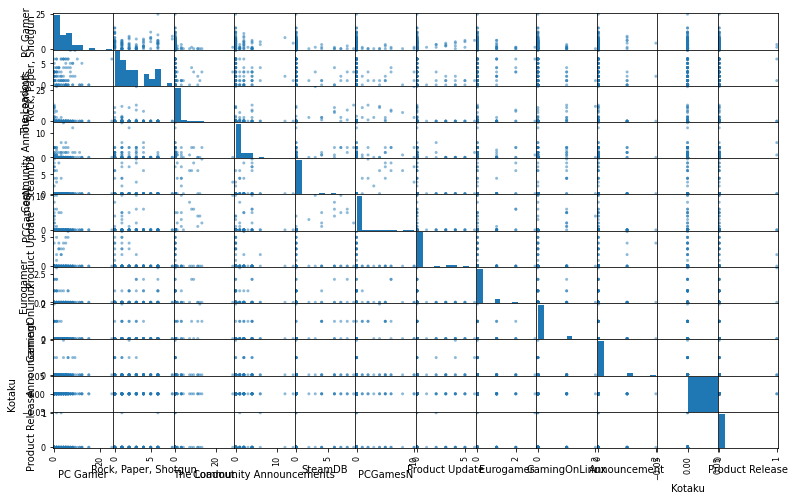

In [110]:
# scatter matrix
pd.plotting.scatter_matrix(CSGO, figsize=(13,8))

In [120]:
# add binary target: positive or negative change
# 1 for positive, 0 for negative
CSGO["Binary_outcome"] = 0
CSGO

C:\Users\David\AppData\Local\Temp/ipykernel_15168/454009451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CSGO["Binary_outcome"] = 0


,Percent_Gain,APP,Date,PC Gamer,"Rock, Paper, Shotgun",The Loadout,Community Announcements,SteamDB,PCGamesN,Product Update,Eurogamer,GamingOnLinux,Announcement,Kotaku,Product Release,Binary_outcome
0,0.05,730,2021-09-01 00:00:00,2,1,1,2,8,5,0,0,1,0,0,0,0
1,1.19,730,2021-08-01 00:00:00,0,1,1,1,4,2,0,0,1,0,0,0,0
2,-7.88,730,2021-07-01 00:00:00,3,1,3,2,4,5,0,0,1,0,0,0,0
3,-16.75,730,2021-06-01 00:00:00,1,0,3,1,4,1,0,1,1,0,0,0,0
4,-8.77,730,2021-05-01 00:00:00,0,2,0,4,7,5,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,14.81,730,2013-01-01 00:00:00,2,0,0,0,0,0,3,0,0,0,0,0,0
105,-0.39,730,2012-12-01 00:00:00,2,0,0,0,0,0,4,0,0,0,0,0,0
106,31.61,730,2012-11-01 00:00:00,3,1,0,6,0,0,2,0,0,0,0,1,0
107,-32.88,730,2012-10-01 00:00:00,5,1,0,0,0,0,5,0,0,0,0,0,0


In [124]:
for i in range (0, len(CSGO)):
    if (CSGO.loc[i, 'Percent_Gain'] > 0):
        CSGO.loc[i, 'Binary_outcome'] = 1
    elif (CSGO.loc[i, 'Percent_Gain'] < 0):
        CSGO.loc[i, 'Binary_outcome'] = 0
    else:
        print("this should never be printed")

CSGO

,Percent_Gain,APP,Date,PC Gamer,"Rock, Paper, Shotgun",The Loadout,Community Announcements,SteamDB,PCGamesN,Product Update,Eurogamer,GamingOnLinux,Announcement,Kotaku,Product Release,Binary_outcome
0,0.05,730,2021-09-01 00:00:00,2,1,1,2,8,5,0,0,1,0,0,0,1
1,1.19,730,2021-08-01 00:00:00,0,1,1,1,4,2,0,0,1,0,0,0,1
2,-7.88,730,2021-07-01 00:00:00,3,1,3,2,4,5,0,0,1,0,0,0,0
3,-16.75,730,2021-06-01 00:00:00,1,0,3,1,4,1,0,1,1,0,0,0,0
4,-8.77,730,2021-05-01 00:00:00,0,2,0,4,7,5,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,14.81,730,2013-01-01 00:00:00,2,0,0,0,0,0,3,0,0,0,0,0,1
105,-0.39,730,2012-12-01 00:00:00,2,0,0,0,0,0,4,0,0,0,0,0,0
106,31.61,730,2012-11-01 00:00:00,3,1,0,6,0,0,2,0,0,0,0,1,1
107,-32.88,730,2012-10-01 00:00:00,5,1,0,0,0,0,5,0,0,0,0,0,0


# Machine Learning

In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

path = "Resources/myopia.csv"
from pathlib import Path


from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf

### supervised

In [163]:
# temporary reference. will do until full data set is passed in.
Monthly_data_cleaned_joined = CSGO

In [169]:
# drop non-numerical data
Monthly_data_cleaned_joined = Monthly_data_cleaned_joined.drop(columns=['APP', 'Date', 'Percent_Gain'])

In [170]:
# make the choice of randomiser explicit:
sample_hold = 42

In [171]:
Monthly_data_cleaned_joined.shape

(109, 13)

In [172]:
# Split the data into X_train, X_test, y_train, y_test
y = Monthly_data_cleaned_joined['Binary_outcome']

X = Monthly_data_cleaned_joined.drop(columns=['Binary_outcome'])


print("Shape: ", X.shape, y.shape)



Shape:  (109, 12) (109,)


In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=sample_hold)



In [177]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [178]:
# Train a Logistic Regression model print the model score
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)



LogisticRegression()

In [179]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")



Training Data Score: 0.691358024691358
Testing Data Score: 0.5


In [180]:
target_names = ["0", "1"]

In [181]:
clf = RandomForestClassifier(random_state=sample_hold).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')



              precision    recall  f1-score   support

           0       0.57      0.33      0.42        12
           1       0.62      0.81      0.70        16

    accuracy                           0.61        28
   macro avg       0.60      0.57      0.56        28
weighted avg       0.60      0.61      0.58        28

Training Score: 0.9753086419753086
Testing Score: 0.6071428571428571


### unsupervised

In [175]:
Monthly_data_cleaned_joined.shape

(109, 13)

In [176]:
Monthly_data_cleaned_joined.describe()

,PC Gamer,"Rock, Paper, Shotgun",The Loadout,Community Announcements,SteamDB,PCGamesN,Product Update,Eurogamer,GamingOnLinux,Announcement,Kotaku,Product Release,Binary_outcome
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.0,109.000000,109.000000
mean,3.880734,2.357798,1.082569,1.091743,0.678899,0.660550,0.513761,0.201835,0.100917,0.082569,0.0,0.018349,0.623853
std,4.084126,2.209085,3.677077,2.209161,1.985506,1.958931,1.344500,0.540573,0.331801,0.308174,0.0,0.134829,0.486655
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
75%,6.000000,4.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
max,25.000000,8.000000,28.000000,14.000000,9.000000,10.000000,6.000000,3.000000,2.000000,2.000000,0.0,1.000000,1.000000


C:\Users\David\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\David\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\David\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


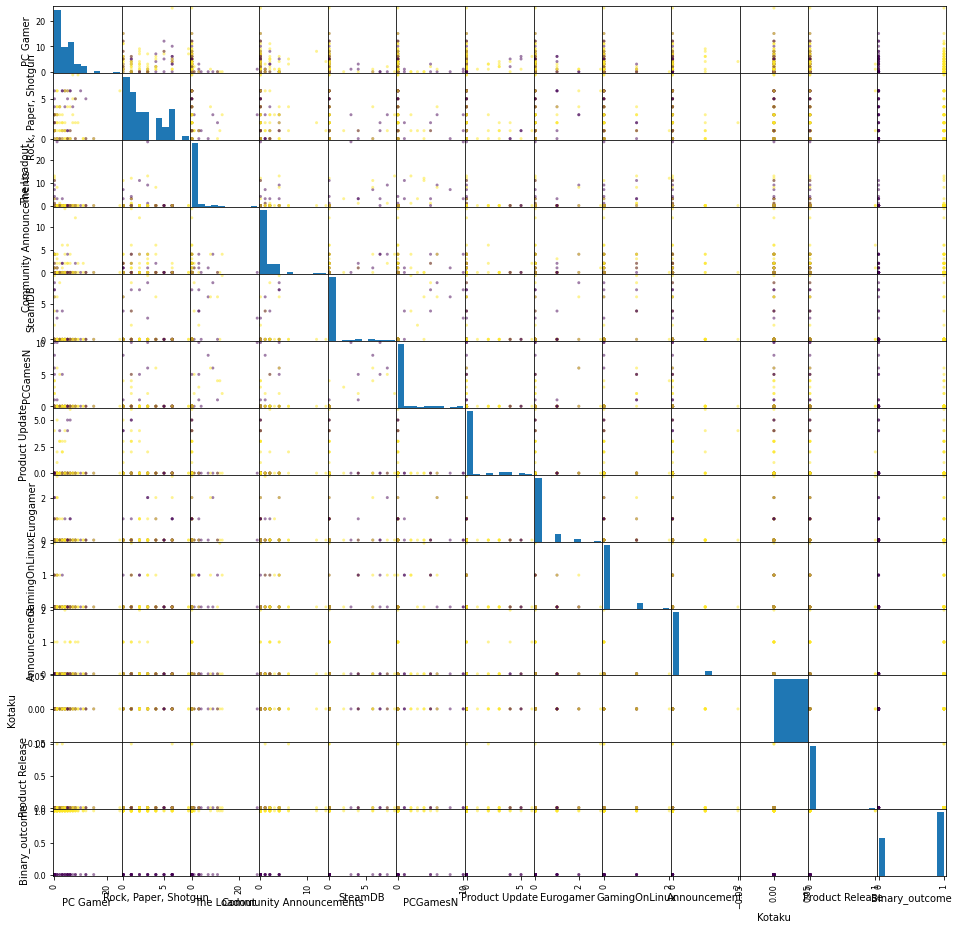

In [167]:
pd.plotting.scatter_matrix(Monthly_data_cleaned_joined, c=Monthly_data_cleaned_joined["Binary_outcome"], figsize=(16,16))
plt.savefig("1.png", format="png")



In [184]:
Monthly_data_cleaned_joined_unsuper = Monthly_data_cleaned_joined.drop(columns=["Binary_outcome"])
Monthly_data_cleaned_joined_unsuper



,PC Gamer,"Rock, Paper, Shotgun",The Loadout,Community Announcements,SteamDB,PCGamesN,Product Update,Eurogamer,GamingOnLinux,Announcement,Kotaku,Product Release
0,2,1,1,2,8,5,0,0,1,0,0,0
1,0,1,1,1,4,2,0,0,1,0,0,0
2,3,1,3,2,4,5,0,0,1,0,0,0
3,1,0,3,1,4,1,0,1,1,0,0,0
4,0,2,0,4,7,5,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
104,2,0,0,0,0,0,3,0,0,0,0,0
105,2,0,0,0,0,0,4,0,0,0,0,0
106,3,1,0,6,0,0,2,0,0,0,0,1
107,5,1,0,0,0,0,5,0,0,0,0,0


In [185]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(Monthly_data_cleaned_joined_unsuper))
X



,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.462625,-0.617482,-0.022559,0.413031,3.704303,2.225445,-0.383886,-0.375097,2.722222,-0.269167,0.0,-0.136717
1,-0.954588,-0.617482,-0.022559,-0.041720,1.680398,0.686924,-0.383886,-0.375097,2.722222,-0.269167,0.0,-0.136717
2,-0.216644,-0.617482,0.523864,0.413031,1.680398,2.225445,-0.383886,-0.375097,2.722222,-0.269167,0.0,-0.136717
3,-0.708607,-1.072249,0.523864,-0.041720,1.680398,0.174083,-0.383886,1.483338,2.722222,-0.269167,0.0,-0.136717
4,-0.954588,-0.162715,-0.295770,1.322534,3.198326,2.225445,-0.383886,-0.375097,2.722222,-0.269167,0.0,-0.136717
...,...,...,...,...,...,...,...,...,...,...,...,...
104,-0.462625,-1.072249,-0.295770,-0.496472,-0.343507,-0.338757,1.857734,-0.375097,-0.305556,-0.269167,0.0,-0.136717
105,-0.462625,-1.072249,-0.295770,-0.496472,-0.343507,-0.338757,2.604940,-0.375097,-0.305556,-0.269167,0.0,-0.136717
106,-0.216644,-0.617482,-0.295770,2.232036,-0.343507,-0.338757,1.110527,-0.375097,-0.305556,-0.269167,0.0,7.314369
107,0.275319,-0.617482,-0.295770,-0.496472,-0.343507,-0.338757,3.352147,-0.375097,-0.305556,-0.269167,0.0,-0.136717


In [186]:
# Initialize PCA model for 90% explained variance
pca = PCA(n_components=0.9)

# Get two principal components for the data.
pcaX = pd.DataFrame(pca.fit_transform(X))
pcaX



,0,1,2,3,4,5,6,7
0,4.270108,-0.878812,-0.377045,0.661006,-0.024501,-0.172726,1.385512,-0.233650
1,2.533629,-0.566972,-0.228093,0.089779,-0.836720,-0.713432,1.781959,0.215250
2,3.433125,-0.777639,-0.496447,0.517930,-0.064974,0.014382,1.478008,0.133734
3,2.720508,0.098232,0.471805,-0.231042,-0.737557,-0.714490,2.088314,-1.048088
4,4.125388,-0.622310,0.013022,1.175716,-0.115365,-0.849231,1.098557,0.332833
...,...,...,...,...,...,...,...,...
104,-0.746982,-1.400146,0.628672,-0.865236,-1.140530,0.456432,-0.080481,0.118353
105,-0.849213,-1.734245,0.919723,-1.131865,-1.149384,0.597026,-0.055214,0.328623
106,-0.382485,1.252078,5.459379,2.543968,-0.669877,3.722569,0.458236,2.311412
107,-1.176688,-1.831306,0.907322,-1.260381,-0.574215,1.005666,0.168372,0.624071


In [188]:
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(pcaX)
TSNE_DF = pd.DataFrame(tsne_features)
TSNE_DF = TSNE_DF.rename(columns={0: "X", 1: "Y"})

TSNE_DF


,X,Y
0,57.355766,-85.162720
1,61.704319,-69.402489
2,59.078899,-77.321632
3,69.262985,-70.475883
4,51.111160,-79.188896
...,...,...
104,28.967257,-22.393076
105,30.076818,-38.263691
106,59.642666,49.108826
107,32.842529,-46.661331


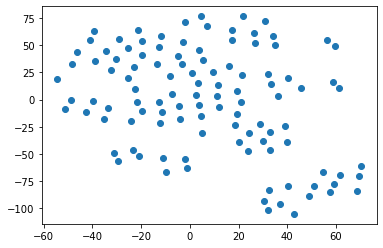

In [189]:
plt.scatter(TSNE_DF.X, TSNE_DF.Y)



In [190]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(TSNE_DF)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

C:\Users\David\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,k,inertia
0,1,358628.156250
1,2,165373.687500
2,3,115476.156250
3,4,81533.265625
4,5,62419.691406
5,6,48346.320312
6,7,38101.281250
7,8,31783.111328
8,9,27429.041016
9,10,24400.531250


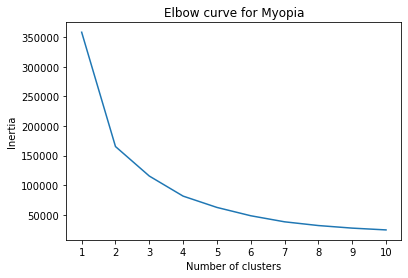

In [191]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Myopia')
plt.show()



In [192]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [193]:
clusters = get_clusters(4, TSNE_DF)

In [194]:
clusters

,X,Y,class
0,57.355766,-85.162720,1
1,61.704319,-69.402489,1
2,59.078899,-77.321632,1
3,69.262985,-70.475883,1
4,51.111160,-79.188896,1
...,...,...,...
104,28.967257,-22.393076,2
105,30.076818,-38.263691,2
106,59.642666,49.108826,3
107,32.842529,-46.661331,1


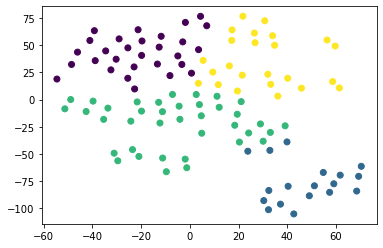

In [195]:
plt.scatter(x=clusters.X, y=clusters.Y, c=clusters["class"])



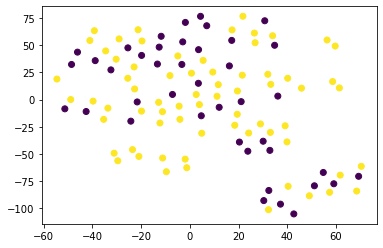

In [197]:
plt.scatter(TSNE_DF.X, TSNE_DF.Y, c=Monthly_data_cleaned_joined.Binary_outcome)



### artificial neural network

In [198]:
input_dimensions=X.shape[1]
input_dimensions

12

In [199]:
X

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.462625,-0.617482,-0.022559,0.413031,3.704303,2.225445,-0.383886,-0.375097,2.722222,-0.269167,0.0,-0.136717
1,-0.954588,-0.617482,-0.022559,-0.041720,1.680398,0.686924,-0.383886,-0.375097,2.722222,-0.269167,0.0,-0.136717
2,-0.216644,-0.617482,0.523864,0.413031,1.680398,2.225445,-0.383886,-0.375097,2.722222,-0.269167,0.0,-0.136717
3,-0.708607,-1.072249,0.523864,-0.041720,1.680398,0.174083,-0.383886,1.483338,2.722222,-0.269167,0.0,-0.136717
4,-0.954588,-0.162715,-0.295770,1.322534,3.198326,2.225445,-0.383886,-0.375097,2.722222,-0.269167,0.0,-0.136717
...,...,...,...,...,...,...,...,...,...,...,...,...
104,-0.462625,-1.072249,-0.295770,-0.496472,-0.343507,-0.338757,1.857734,-0.375097,-0.305556,-0.269167,0.0,-0.136717
105,-0.462625,-1.072249,-0.295770,-0.496472,-0.343507,-0.338757,2.604940,-0.375097,-0.305556,-0.269167,0.0,-0.136717
106,-0.216644,-0.617482,-0.295770,2.232036,-0.343507,-0.338757,1.110527,-0.375097,-0.305556,-0.269167,0.0,7.314369
107,0.275319,-0.617482,-0.295770,-0.496472,-0.343507,-0.338757,3.352147,-0.375097,-0.305556,-0.269167,0.0,-0.136717


In [200]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=5), activation=activation, input_dim=input_dimensions))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=100,
            step=5),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [201]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    overwrite=True,
    max_epochs=20,
    hyperband_iterations=2,)

In [205]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 72 Complete [00h 00m 03s]
val_accuracy: 0.6428571343421936

Best val_accuracy So Far: 0.6428571343421936
Total elapsed time: 00h 07m 35s
INFO:tensorflow:Oracle triggered exit
